In [2]:
#| export
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from matplotlib import animation
from IPython.display import HTML

In [3]:
def default_fig_setup():
    fig, ax = plt.subplots()
    return fig, ax
    

def simple_animation(X, Y, 
                     xlabel = 'x-position', 
                     ylabel = 'y-position',
                     setup_fig_function = default_fig_setup,
                     xlims = [], ylims = [], 
                    labels = [],
                     linewidth = 5,
                     legend = False,
                     interval = 200,
                     **plotargs
                    ):
    '''
    `simple_animation(X, Y)` is a function that takes x2 3D arrays, `X` and `Y` 
    and returns an animation of the changing lines
    
    The `X` and `Y` arrays need to be arranged in 3D arrays such that, 
    
    `X[line_N, point_i, time_j], Y[line_N, point_i, time_j]`
    
    where each line is arranged in columns and the next frame is aranged in the 
    third dimension of the array
    
    If you are plotting a single line, you can use the columns as the timestep e.g. 
    
    `X[point_i, time_j], Y[point_i, time_j]`
    
     the function will add an extra axis to the beginning of the arrays as such
     
     `X[:, np.new_axis :], Y[:, np.new_axis, :]`
    
    Parameters:
    ----------
    `X`: The x-axis data for the animated lines, its shape is such that each column 
         is a set of x-values for a given line and each frame is organized along the 
         third dimension
    `Y`: The y-axis data for the animated lines, its shape is such that each column 
         is a set of y-values for a given line and each frame is organized along the 
         third dimension
    xlabel:  plot x-axis label, default is 'x-position', 
    ylabel: plot y-axis label, default is 'y-position', 
    setup_fig_function: a function that returns fig and ax that can be used to plot static lines 
                        before animating, default is an empty plot
    xlims: Manually set the x-axis limits. If its not specified, the animation uses 1.1*(max&min)
    ylims: [], 
    labels: [],
    linewidth: 5
    legend: False,
    `interval` : int, default: 200
                 Delay between frames in milliseconds.
    **plotargs: used as **kwargs for matplotlib's plot command
    

    scalex, scaley : bool, default: True
        These parameters determine if the view limits are adapted to the
        data limits. The values are passed on to `autoscale_view`.

    **kwargs : `.Line2D` properties, optional
    *kwargs* are used to specify properties like a line label (for
    auto legends), linewidth, antialiasing, marker face color.
    Example::

    >>> plot([1, 2, 3], [1, 2, 3], 'go-', label='line 1', linewidth=2)
    >>> plot([1, 2, 3], [1, 4, 9], 'rs', label='line 2')

    If you make multiple lines with one plot call, the kwargs
    apply to all those lines.

    Here is a list of available `.Line2D` properties:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: float or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    color or c: color
    contains: unknown
    dash_capstyle: {'butt', 'round', 'projecting'}
    dash_joinstyle: {'miter', 'round', 'bevel'}
    dashes: sequence of floats (on/off ink in points) or (None, None)
    data: (2, N) array or two 1D arrays
    drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
    figure: `.Figure`
    fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
    gid: str
    in_layout: bool
    label: object
    linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    linewidth or lw: float
    marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
    markeredgecolor or mec: color
    markeredgewidth or mew: float
    markerfacecolor or mfc: color
    markerfacecoloralt or mfcalt: color
    markersize or ms: float
    markevery: None or int or (int, int) or slice or List[int] or float or (float, float) or List[bool]
    path_effects: `.AbstractPathEffect`
    picker: unknown
    pickradius: float
    rasterized: bool or None
    sketch_params: (scale: float, length: float, randomness: float)
    snap: bool or None
    solid_capstyle: {'butt', 'round', 'projecting'}
    solid_joinstyle: {'miter', 'round', 'bevel'}
    transform: `matplotlib.transforms.Transform`
    url: str
    visible: bool
    xdata: 1D array
    ydata: 1D array
    zorder: float
    
    Returns:
    --------
    `anim`: an `animation.FuncAnimation` result that can be viewed with Jupyter's HTML
          e.g. `HTML(anim.to_html5_video())` or `HTML(anim.to_jshtml())`
    '''
    if len(X.shape) < 3:
        X = X[:, np.newaxis, :]
    if len(Y.shape) < 3:
        Y = Y[:, np.newaxis,:]
    
    fig, ax = setup_fig_function()

    if len(xlims)<2: 
        ax.set_xlim((np.min(X)*1.1, np.max(X)*1.1));
    else: ax.set_xlim(xlims)
    if len(ylims)<2:
        ax.set_ylim((np.min(Y)*1.1, np.max(Y)*1.1));
    else: ax.set_ylim(ylims)
    
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

    i = 0
    lines = ax.plot(X[:, :, i], Y[:, :, i], lw=linewidth, **plotargs);
    if legend:
        plt.legend(lines, labels)

    def init():
        for j in range(len(lines)):
            lines[j].set_data([], [])
        return lines

    def animate(i):
        for j in range(len(lines)):
            lines[j].set_data(X[:, j, i], Y[:, j, i])
        return lines

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=range(0,len(t)), 
                                   blit=True, interval = interval)
    plt.close(fig)
    HTML(anim.to_html5_video())
    return anim

Set up `X` and `Y` variables that are functions of time

each column is a single line, $x-$ or $y-$ values. Here, the first point in time is called with all columns and all rows. Each $(x_{zN},~y_{zN})$ is plotted as a single line for that animation frame. 
- lines that will be drawn are labeled $a,~b,~...~z$, for 4 lines, there are 4 columns. 
- $x-y$ coordinates are numbered $1,~2,~...~N$, for 100 coordinates, there are 100 rows. 

$X[:,~ :,~ 0] = \left[\begin{array}
~x_{a1}(0) & x_{b1}(0) & ... & x_{z1}(0)\\
x_{a2}(0) & x_{b2}(0) & ... & x_{z2}(0)\\
x_{a3}(0) & x_{b2}(0) & ... & x_{z3}(0)\\
... & ... & ... & ...\\
x_{aN}(0) & x_{bN}(0) & ... & x_{zN}(0)
\end{array}\right]$

$Y[:,~ :,~ 0] = \left[\begin{array}
~y_{a1}(0) & y_{b1}(0) & ... & y_{z1}(0)\\
y_{a2}(0) & y_{b2}(0) & ... & y_{z2}(0)\\
y_{a3}(0) & y_{b2}(0) & ... & y_{z3}(0)\\
... & ... & ... & ...\\
y_{aN}(0) & y_{bN}(0) & ... & y_{zN}(0)
\end{array}\right]$

The next time step would be, 

$X[:,~ :,~ 1] = \left[\begin{array}
~x_{a1}(\Delta t) & x_{b1}(\Delta t) & ... & x_{z1}(\Delta t)\\
x_{a2}(\Delta t) & x_{b2}(\Delta t) & ... & x_{z2}(\Delta t)\\
    x_{a3}(\Delta t) & x_{b2}(\Delta t) & ... & x_{z3}(\Delta t)\\
... & ... & ... & ...\\
x_{aN}(\Delta t) & x_{bN}(\Delta t) & ... & x_{zN}(\Delta t)
\end{array}\right]$

$Y[:,~ :,~ 1] = \left[\begin{array}
~y_{a1}(\Delta t) & y_{b1}(\Delta t) & ... & y_{z1}(\Delta t)\\
y_{a2}(\Delta t) & y_{b2}(\Delta t) & ... & y_{z2}(\Delta t)\\
y_{a3}(\Delta t) & y_{b2}(\Delta t) & ... & y_{z3}(\Delta t)\\
... & ... & ... & ...\\
y_{aN}(\Delta t) & y_{bN}(\Delta t) & ... & y_{zN}(\Delta t)
\end{array}\right]$

In [4]:
t = np.linspace(0, 5)
x = np.linspace(0, 2*np.pi, 100)


y1 = np.sin(x/2)
y2 = np.sin(x)
y3 = np.sin(1.5*x)
y4 = np.sin(2*x)


A1 = np.exp(-t/2)*np.cos(6*t)
A2 = np.exp(-t/2)*np.cos(6*t)



y = np.array([y1, y2, y3, y4]).T
# y = n
y[::10, :]

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.31203345,  0.59290793,  0.81457595,  0.95490224],
       [ 0.59290793,  0.95490224,  0.94500082,  0.56705986],
       [ 0.81457595,  0.94500082,  0.28173256, -0.61815899],
       [ 0.95490224,  0.56705986, -0.61815899, -0.93414786],
       [ 0.99987413, -0.03172793, -0.99886734,  0.06342392],
       [ 0.94500082, -0.61815899, -0.54064082,  0.97181157],
       [ 0.79576184, -0.96384216,  0.37166246,  0.51367739],
       [ 0.56705986, -0.93414786,  0.97181157, -0.666769  ],
       [ 0.28173256, -0.54064082,  0.75574957, -0.909632  ]])

In [5]:
X = np.zeros((len(x), y.shape[1], len(t)))
Y = np.zeros((len(x), y.shape[1], len(t)))

for i in range(len(t)):
    Y[:, :, i] = A1[i]*y
    X[:, :, i] = np.array([x for i in range(y.shape[1])]).T
    


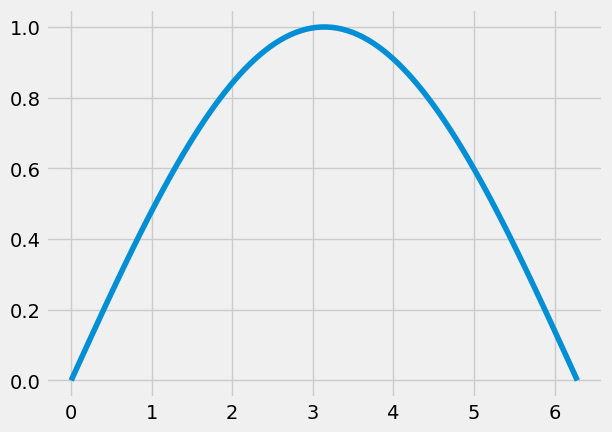

In [6]:
for i in range(0, 1):
    plt.plot(X[:, 0, i], Y[:, 0, i])

In [7]:
anim = simple_animation(X[:, 0, :], Y[:, 0, :])#, labels = ['y1', 'y2', 'y3', 'y4'], legend = True);

HTML(anim.to_html5_video())

In [10]:
a = np.linspace(0, 2*np.pi, 100)

x1 = np.cos(a)
y1 = np.sin(a)

x2 = np.cos(5*a)
y2 = np.sin(5*a)
X = np.array([np.zeros(len(a)), x1, x1+x2])
Y = np.array([np.zeros(len(a)), y1, y1+y2])

<AxesSubplot: >

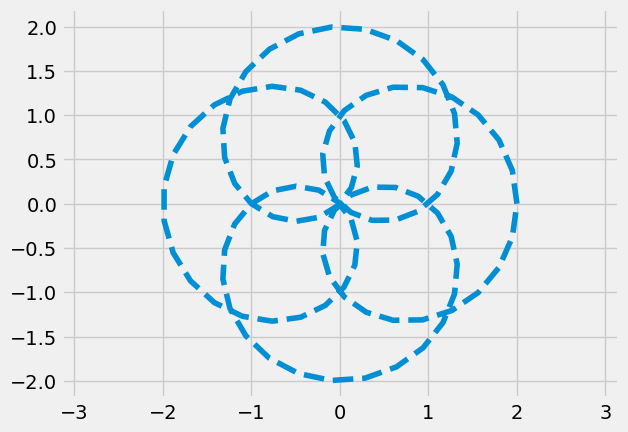

In [11]:
def fig_setup():
    fig, ax = plt.subplots()
    
    ax.plot(X[2, :], Y[2, :], '--')
    ax.axis('equal')
    return fig, ax
f, a = fig_setup()
a

In [12]:
a = simple_animation(X, Y, setup_fig_function= fig_setup)

In [13]:
HTML(a.to_html5_video())